#Experiment 1: Exploratory Data Analysis

###Name: Jayesh Vikas Bane

###UID: 2019120006

###Class: TE EXTC

###Batch: A

The Law Enforcement Employees dataset is made up of data collected annually about law enforcement officers and civilians employed by law enforcement agencies.The dataset contains information about the number of officers and civilians employed and the rate of law enforcement employees per a location’s population.

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Inference: Importing the necessary libraries

## Reading Data

In [234]:
df = pd.read_csv('/content/pe_1960_2020.csv')

Inference: Reading the data and creating a pandas Dataframe.

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state_postal_abbr        3100 non-null   object 
 1   data_year                3100 non-null   int64  
 2   officer                  2548 non-null   float64
 3   officer_rate_per_1000    2548 non-null   float64
 4   civilian_count           2548 non-null   float64
 5   civilian__rate_per_1000  2548 non-null   float64
 6   population               3100 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 169.7+ KB


Inference: Displaying the various columns and their data types with number of null values.

In [236]:
df = df.convert_dtypes()

Inference: Converting the object types to their proper data type

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state_postal_abbr        3100 non-null   string 
 1   data_year                3100 non-null   Int64  
 2   officer                  2548 non-null   Int64  
 3   officer_rate_per_1000    2548 non-null   Float64
 4   civilian_count           2548 non-null   Int64  
 5   civilian__rate_per_1000  2548 non-null   Float64
 6   population               3100 non-null   Int64  
dtypes: Float64(2), Int64(4), string(1)
memory usage: 187.8 KB


Inference: Rechecking the info for data type conversion.

In [238]:
officerMean = int(df['officer'].mean())
officerRateMean = df['officer_rate_per_1000'].mean()
civilianMean = int(df['civilian_count'].mean())
civilianRateMean = df['civilian__rate_per_1000'].mean()

df['officer'] = df['officer'].fillna(officerMean)
df['officer_rate_per_1000'] = df['officer_rate_per_1000'].fillna(officerRateMean)
df['civilian_count'] = df['civilian_count'].fillna(civilianMean)
df['civilian__rate_per_1000'] = df['civilian__rate_per_1000'].fillna(civilianRateMean)
# df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)

Inference: Filling null values in a particular column with the mean value of that column.

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state_postal_abbr        3100 non-null   string 
 1   data_year                3100 non-null   Int64  
 2   officer                  3100 non-null   Int64  
 3   officer_rate_per_1000    3100 non-null   Float64
 4   civilian_count           3100 non-null   Int64  
 5   civilian__rate_per_1000  3100 non-null   Float64
 6   population               3100 non-null   Int64  
dtypes: Float64(2), Int64(4), string(1)
memory usage: 187.8 KB


In [240]:
df.head()

,state_postal_abbr,data_year,officer,officer_rate_per_1000,civilian_count,civilian__rate_per_1000,population
0,AK,1960,10911,2.156461,4123,0.756809,70828
1,AK,1961,10911,2.156461,4123,0.756809,222930
2,AK,1963,10911,2.156461,4123,0.756809,83943
3,AK,1964,10911,2.156461,4123,0.756809,232007
4,AK,1965,10911,2.156461,4123,0.756809,81331


Inference: Displaying the top 5 rows of the data.

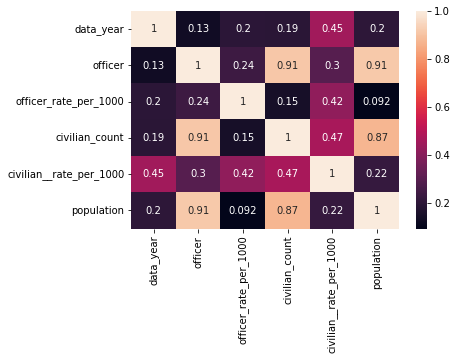

In [241]:
sns.heatmap(df.corr(), annot=True);

Inference: Here we can see the correlation plot between the different numeric attributes present in the dataset. We can observe the diagonal is set to 1 as each attribte will be perfectly correlated with itself.

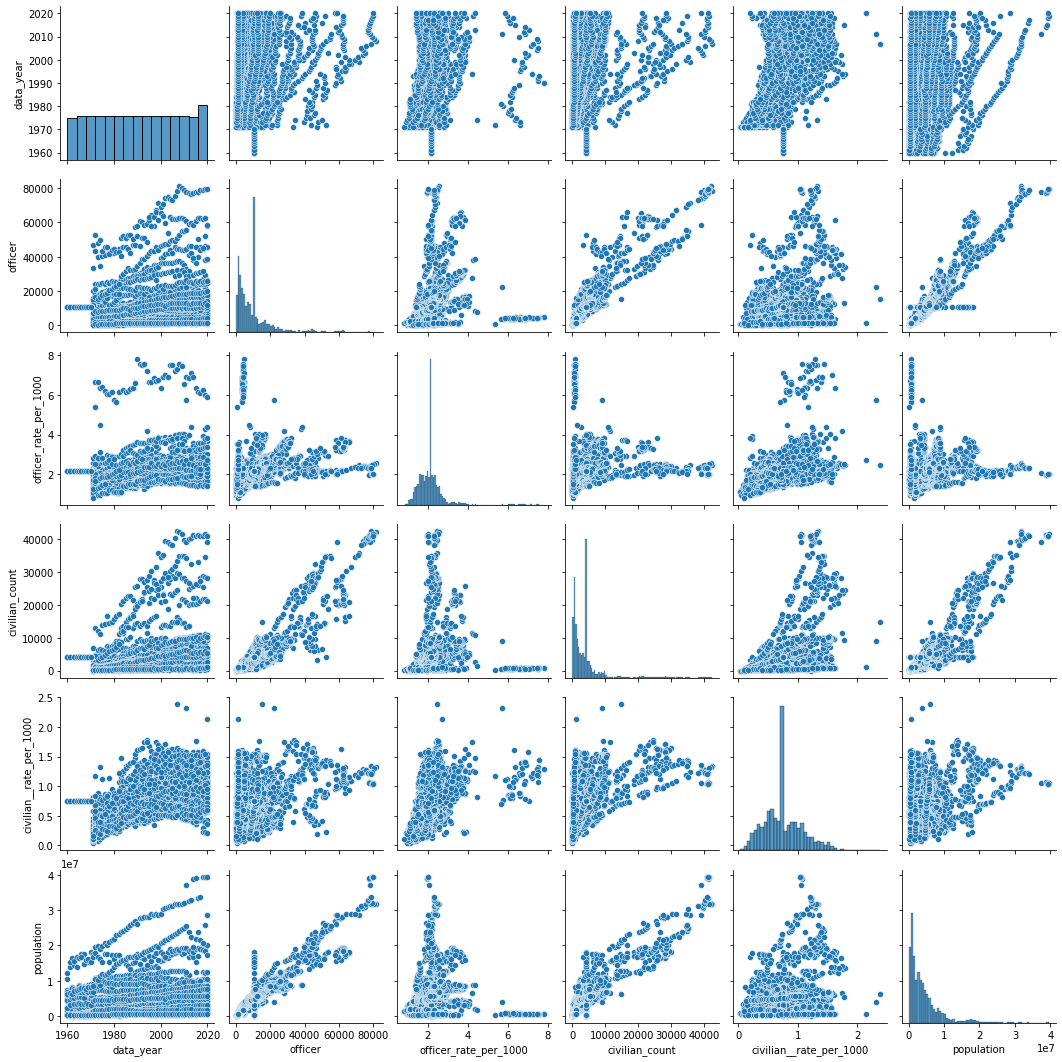

In [242]:
sns.pairplot(data=df)

Inference: This is a pair-plot. It plots all the relationships between numeric attributes as seen in the heat map above.

In [243]:
groupbyState = df.groupby(['state_postal_abbr'], as_index=False).sum()
groupbyState.head()

,state_postal_abbr,data_year,officer,officer_rate_per_1000,civilian_count,civilian__rate_per_1000,population
0,AK,117413,155182,110.30948,66678,53.96237,27003305
1,AL,121390,522043,124.667579,222522,51.921748,213220129
2,AR,121390,335928,108.686347,149434,47.491858,130507087
3,AZ,121390,553809,120.88058,346753,70.693656,237611677
4,CA,121390,3213834,132.467767,1498988,57.941564,1582771136


Inference: Grouped the data together by the states using the groupby method and applied the sum() aggregate function to get the totals of all numeric values. The as_index parameter set to False lets us keep the column we are grouping by as an attribute.

In [244]:
groupbyYear = df.groupby(['data_year'], as_index=False).sum()
groupbyYear.head()

,data_year,officer,officer_rate_per_1000,civilian_count,civilian__rate_per_1000,population
0,1960,556461,109.979508,210273,38.597276,103753396
1,1961,556461,109.979508,210273,38.597276,117253010
2,1962,458262,90.57136,173166,31.785992,122270294
3,1963,556461,109.979508,210273,38.597276,130653782
4,1964,556461,109.979508,210273,38.597276,132080398


Inference: Grouped the data together by the years from 1960 to 2020 using the groupby method and applied the sum() aggregate function to get the totals of all numeric values. The as_index parameter set to False lets us keep the column we are grouping by as an attribute.

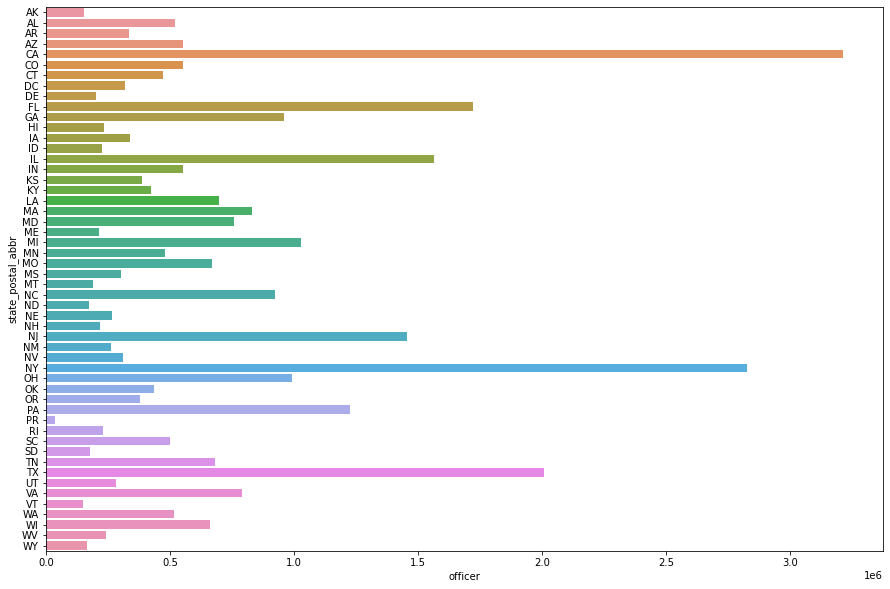

In [245]:
plt.figure(figsize=(15,10))
officerTotalChart = sns.barplot(data=groupbyState, x="officer", y="state_postal_abbr");

Inference: This plot shows us the total number of Law Enforcement Officers from 1960 to 2020 per state in the USA.

In [246]:
data2020 = df[df['data_year'] == 2020]

Inference: Filtering out the Data for the year 2020.

Inference: This a correlation plot between the numeric attributes of the 

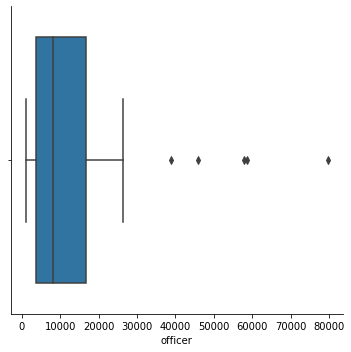

In [247]:
sns.catplot(data=data2020, x="officer", kind="box");

Inference: This plot shows us the outliers present in the law enforcement officer count in 2020

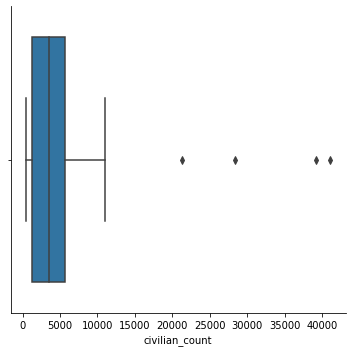

In [248]:
sns.catplot(data=data2020, x="civilian_count", kind="box");

Inference: This plot shows us the outliers present in the civilians employed by law enforcement agencies in 2020

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


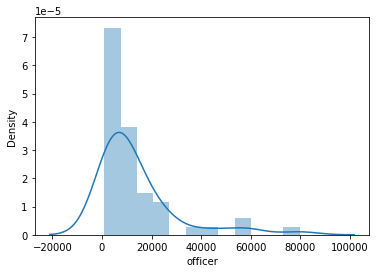

In [249]:
sns.distplot(data2020['officer']);

Inference: This plot shows us the distribution of Law Enforcement Officers per state in 2020. The curve is slightly skewed to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


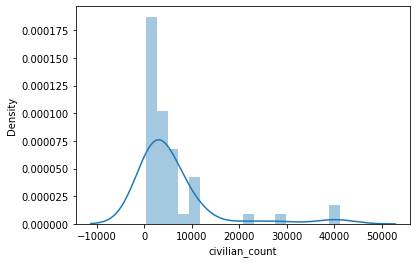

In [250]:
sns.distplot(data2020['civilian_count']);

Inference: This plot shows us the distribution of civilians employed by Law Enforcement Agencies per state in 2020. The curve is also slightly skewed to the right.

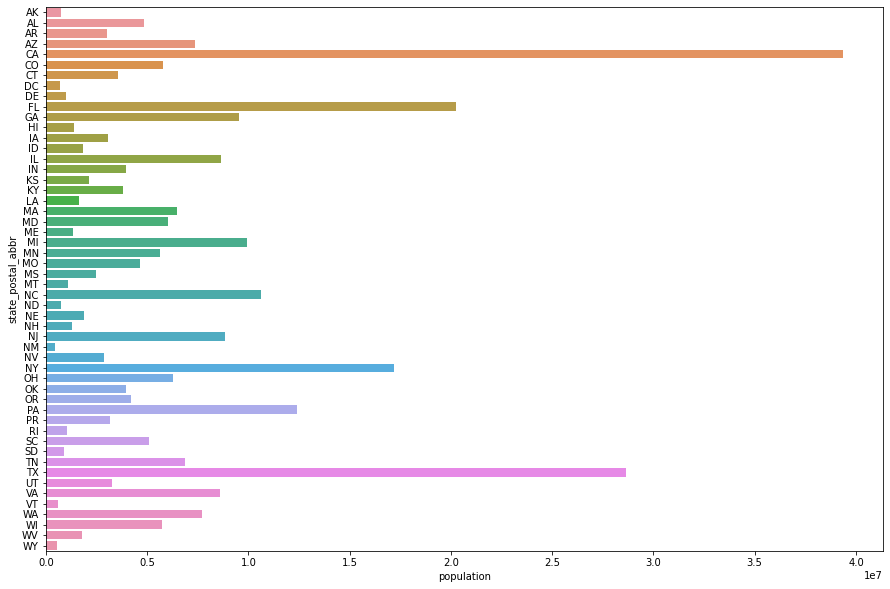

In [251]:
plt.figure(figsize=(15,10))
sns.barplot(data=data2020, x="population", y="state_postal_abbr");

Inference: This chart shows us the population per state in 2020

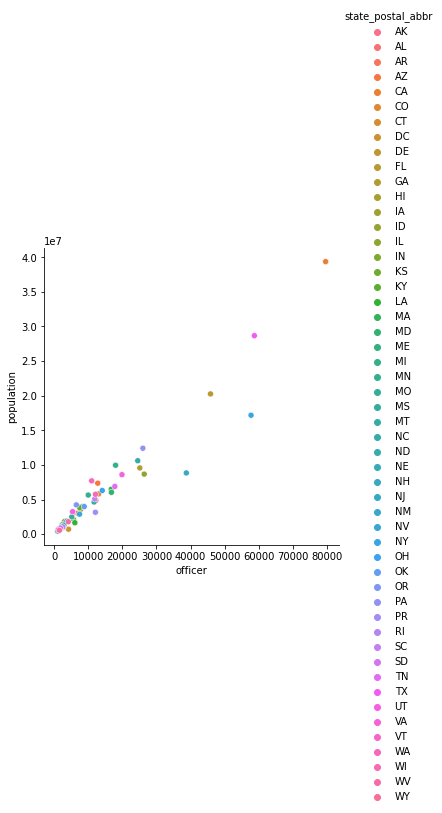

In [252]:
sns.relplot(data=data2020, x="officer", y="population", hue="state_postal_abbr");

Inference: This chart shows us the officer count per state vs the population per state in the year 2020.

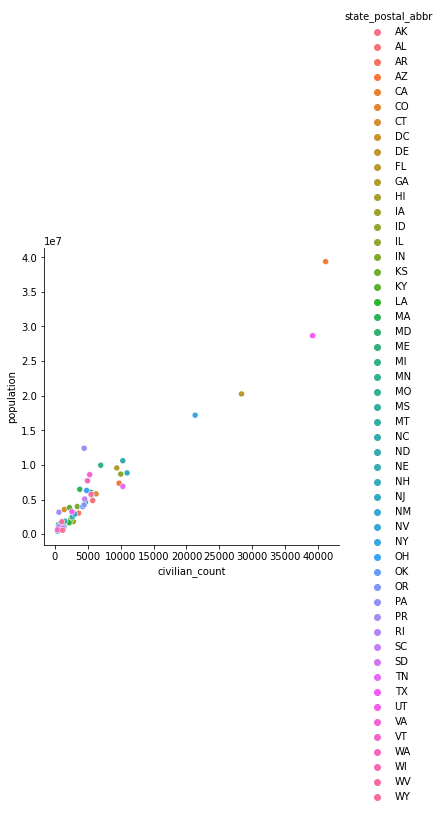

In [253]:
sns.relplot(data=data2020, x="civilian_count", y="population", hue="state_postal_abbr");

Inference: This chart shows us the civilians employed in law enforcement per state vs the population per state in the year 2020.

Findings from this experiment:

*   The state of California has the highest population in the time frame of 1960 to 2020 as well as 2020 itself.
*   California also has the highest number of law enforcement officers of any state in 2020.
*   The state of California has the highest law enforcement officers ratio in its population in 2020.
*   California also has the highest number of civilians employed in law enforcement agencies in 2020.
*   New York has the highest ratio for civilians employed in law enforcement agencies in 2020.
*   The distributions of law enforcement officers as well as civilians in law enforcement are slightly skewed to the right indicating deviance from mean.

